In [11]:
import pandas as pd

AAL_mapping_final = pd.read_excel('AAL_Mapping.xlsx')

In [12]:
AAL_mapping_final

,Unnamed: 0,AAL3_Index,AAL3_Region,AAL90_Index,AAL90_Region
0,1,2,Precentral_L,1.0,Precentral_L
1,2,3,Precentral_R,2.0,Precentral_R
2,3,4,Frontal_Sup_2_L,3.0,Frontal_Sup_L
3,4,5,Frontal_Sup_2_R,4.0,Frontal_Sup_R
4,5,6,Frontal_Mid_2_L,7.0,Frontal_Mid_L
...,...,...,...,...,...
161,162,163,Red_N_R,NaN,NaN
162,163,164,LC_L,NaN,NaN
163,164,165,LC_R,NaN,NaN
164,165,166,Raphe_D,NaN,NaN


In [1]:
lobulos = {
    "Lóbulo Frontal": [
        "Precentral_L", "Precentral_R",
        "Frontal_Sup_L", "Frontal_Sup_R",
        "Frontal_Sup_Orb_L", "Frontal_Sup_Orb_R",
        "Frontal_Mid_L", "Frontal_Mid_R",
        "Frontal_Mid_Orb_L", "Frontal_Mid_Orb_R",
        "Frontal_Inf_Oper_L", "Frontal_Inf_Oper_R",
        "Frontal_Inf_Tri_L", "Frontal_Inf_Tri_R",
        "Frontal_Inf_Orb_L", "Frontal_Inf_Orb_R",
        "Rolandic_Oper_L", "Rolandic_Oper_R",
        "Supp_Motor_Area_L", "Supp_Motor_Area_R",
        "Olfactory_L", "Olfactory_R",
        "Frontal_Sup_Medial_L", "Frontal_Sup_Medial_R",
        "Frontal_Med_Orb_L", "Frontal_Med_Orb_R",
        "Rectus_L", "Rectus_R"
    ],
    "Sistema Límbico": [
        "Insula_L", "Insula_R",
        "Cingulum_Ant_L", "Cingulum_Ant_R",
        "Cingulum_Mid_L", "Cingulum_Mid_R",
        "Cingulum_Post_L", "Cingulum_Post_R",
        "Hippocampus_L", "Hippocampus_R",
        "ParaHippocampal_L", "ParaHippocampal_R",
        "Amygdala_L", "Amygdala_R"
    ],
    "Lóbulo Occipital": [
        "Calcarine_L", "Calcarine_R",
        "Cuneus_L", "Cuneus_R",
        "Lingual_L", "Lingual_R",
        "Occipital_Sup_L", "Occipital_Sup_R",
        "Occipital_Mid_L", "Occipital_Mid_R",
        "Occipital_Inf_L", "Occipital_Inf_R",
        "Fusiform_L", "Fusiform_R",
        "Postcentral_L", "Postcentral_R"
    ],
    "Lóbulo Parietal": [
        "Parietal_Sup_L", "Parietal_Sup_R",
        "Parietal_Inf_L", "Parietal_Inf_R",
        "SupraMarginal_L", "SupraMarginal_R",
        "Angular_L", "Angular_R",
        "Precuneus_L", "Precuneus_R",
        "Paracentral_Lobule_L", "Paracentral_Lobule_R"
    ],
    "Lóbulo Temporal": [
        "Heschl_L", "Heschl_R",
        "Temporal_Sup_L", "Temporal_Sup_R",
        "Temporal_Pole_Sup_L", "Temporal_Pole_Sup_R",
        "Temporal_Mid_L", "Temporal_Mid_R",
        "Temporal_Pole_Mid_L", "Temporal_Pole_Mid_R",
        "Temporal_Inf_L", "Temporal_Inf_R"
    ]
}


In [14]:
colores_base = {
    "Lóbulo Frontal": "#8B0000",       # rojo oscuro
    "Lóbulo Parietal": "#006400",      # verde oscuro
    "Lóbulo Occipital": "#00008B",     # azul oscuro
    "Lóbulo Temporal": "#FF8C00",      # naranjo oscuro
    "Sistema Límbico": "#008B8B"       # celeste oscuro
}


In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
import numpy as np

region_colors = {}

for lobulo, regiones in lobulos.items():
    base_rgb = np.array(to_rgb(colores_base[lobulo]))
    n = len(regiones)
    factors = np.linspace(0.4, 1.0, n)  # oscurece el color (0.4 a 1)
    
    for region, factor in zip(regiones, factors):
        region_colors[region] = tuple(base_rgb * factor)


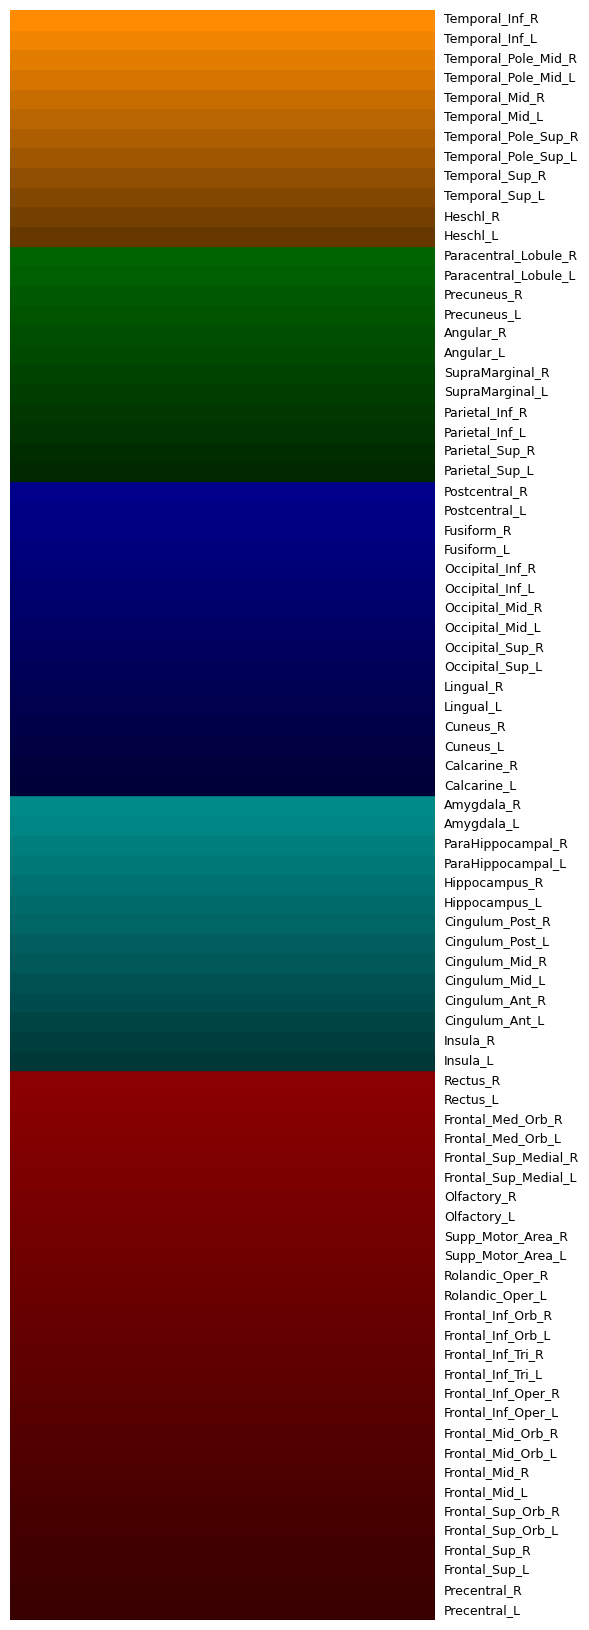

In [16]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(6, len(region_colors) * 0.2))
ax.set_xlim(0, 1)
ax.set_ylim(0, len(region_colors))

for i, (region, color) in enumerate(region_colors.items()):
    ax.add_patch(mpatches.Rectangle((0, i), 1, 1, color=color))
    ax.text(1.02, i + 0.5, region, va='center', fontsize=9)

ax.axis('off')
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
import numpy as np
from matplotlib.colors import to_rgb, to_hex
import unicodedata

# Función para quitar tildes
def quitar_tildes(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

# Diccionario lobulos sin tildes
lobulos_sin_tildes = {quitar_tildes(k): v for k, v in lobulos.items()}

# Colores base por lóbulo (oscuros)
colores_base = {
    "Lobulo Frontal": "#8B0000",     # Rojo oscuro
    "Lobulo Parietal": "#006400",    # Verde oscuro
    "Lobulo Occipital": "#00008B",   # Azul oscuro
    "Lobulo Temporal": "#FF8C00",    # Naranjo oscuro
    "Sistema Limbico": "#008B8B"     # Celeste oscuro
}

# Mapa: region → lobulo (por nombre AAL90)
region_to_lobulo = {}
for lobulo, regiones in lobulos_sin_tildes.items():
    for region in regiones:
        region_to_lobulo[region] = lobulo

# Paleta por región AAL90
region_colors = {}
for lobulo, regiones in lobulos_sin_tildes.items():
    base_rgb = np.array(to_rgb(colores_base[lobulo]))
    n = len(regiones)
    tonos = np.linspace(0.4, 1.0, n)
    for region, tono in zip(regiones, tonos):
        rgb_tuple = tuple(base_rgb * tono)
        region_colors[region] = {
            'RGB': ','.join(f"{c:.3f}" for c in rgb_tuple),
            'HEX': to_hex(rgb_tuple)
        }

# Copia del DataFrame original
df_regiones_cerebrales = AAL_mapping_final.copy()

# Inicializar nuevas columnas
df_regiones_cerebrales['Lobulo'] = np.nan
df_regiones_cerebrales['Color_RGB'] = np.nan
df_regiones_cerebrales['Color_HEX'] = np.nan

# Guardar asignaciones únicas por region AAL90
aal90_info = {}

for _, row in df_regiones_cerebrales.iterrows():
    region90 = row['AAL90_Region']
    if pd.isna(region90):
        continue
    if region90 not in aal90_info:
        lobulo = region_to_lobulo.get(region90)
        color_dict = region_colors.get(region90)
        if lobulo and color_dict:
            aal90_info[region90] = (lobulo, color_dict['RGB'], color_dict['HEX'])

# Asignar a cada fila en base a AAL90
for i, row in df_regiones_cerebrales.iterrows():
    region90 = row['AAL90_Region']
    if pd.isna(region90):
        continue
    if region90 in aal90_info:
        lobulo, rgb, hex_color = aal90_info[region90]
        df_regiones_cerebrales.at[i, 'Lobulo'] = lobulo
        df_regiones_cerebrales.at[i, 'Color_RGB'] = rgb
        df_regiones_cerebrales.at[i, 'Color_HEX'] = hex_color

# Guardar archivo
df_regiones_cerebrales.to_excel("AAL_mapping_final_con_colores.xlsx", index=False)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7232\1921508169.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Lobulo Frontal' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_regiones_cerebrales.at[i, 'Lobulo'] = lobulo
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7232\1921508169.py:70: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.218,0.000,0.000' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_regiones_cerebrales.at[i, 'Color_RGB'] = rgb
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7232\1921508169.py:71: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '#380000' has dtype incompatible with float64, please explicitly cast to a compatible dtype fi

In [9]:
df_regiones_cerebrales

,Unnamed: 0,AAL3_Index,AAL3_Region,AAL90_Index,AAL90_Region,Lobulo,Color_RGB,Color_HEX
0,1,2,Precentral_L,1.0,Precentral_L,Lobulo Frontal,"0.218,0.000,0.000",#380000
1,2,3,Precentral_R,2.0,Precentral_R,Lobulo Frontal,"0.230,0.000,0.000",#3b0000
2,3,4,Frontal_Sup_2_L,3.0,Frontal_Sup_L,Lobulo Frontal,"0.242,0.000,0.000",#3e0000
3,4,5,Frontal_Sup_2_R,4.0,Frontal_Sup_R,Lobulo Frontal,"0.254,0.000,0.000",#410000
4,5,6,Frontal_Mid_2_L,7.0,Frontal_Mid_L,Lobulo Frontal,"0.291,0.000,0.000",#4a0000
...,...,...,...,...,...,...,...,...
161,162,163,Red_N_R,NaN,NaN,NaN,NaN,NaN
162,163,164,LC_L,NaN,NaN,NaN,NaN,NaN
163,164,165,LC_R,NaN,NaN,NaN,NaN,NaN
164,165,166,Raphe_D,NaN,NaN,NaN,NaN,NaN
